# Why Clustering?

Clustering is typically used when supervised learning is not applicable or when labeled data is scarce or unavailable. Here are some scenarios where clustering is preferred over supervised learning:

**Lack of Labeled Data:**

Supervised learning requires labeled data, where each example is paired with a corresponding target or outcome. In situations where labeled data is scarce or expensive to obtain, clustering allows for unsupervised analysis without the need for labeled examples.

**Exploratory Data Analysis:**

Clustering is valuable for exploratory data analysis when the underlying structure of the data is not well-understood. It helps identify natural groupings or patterns without making assumptions about the relationships between features and labels.

**Unknown Outcome or Target:**

In some cases, the outcome or target variable may not be well-defined or known in advance. Clustering is useful for discovering inherent structures in the data without relying on predefined labels.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris=pd.read_csv("D:/Exercises and Datasources/Datasets/Iris/Iris.csv")

In [3]:
iris[0:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Insight into Cluster Composition:**

A cross tabulation provides a clear view of how many data points from each species are assigned to each cluster. This can help you understand the composition of clusters and identify if there are any species that are consistently grouped together or if there are instances of misclassification.

In [6]:
iris_outcome = pd.crosstab(index=iris["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# Exploratory Data Analysis

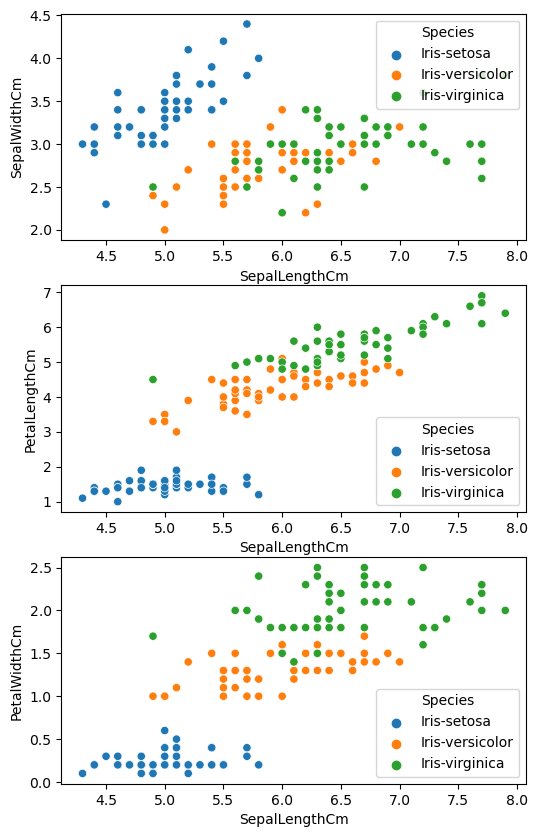

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))
sns.scatterplot(data=iris,x='SepalLengthCm',y='SepalWidthCm',hue='Species',ax=axs[0])
sns.scatterplot(data=iris,x='SepalLengthCm',y='PetalLengthCm',hue='Species',ax=axs[1])
sns.scatterplot(data=iris,x='SepalLengthCm',y='PetalWidthCm',hue='Species',ax=axs[2])
plt.show()

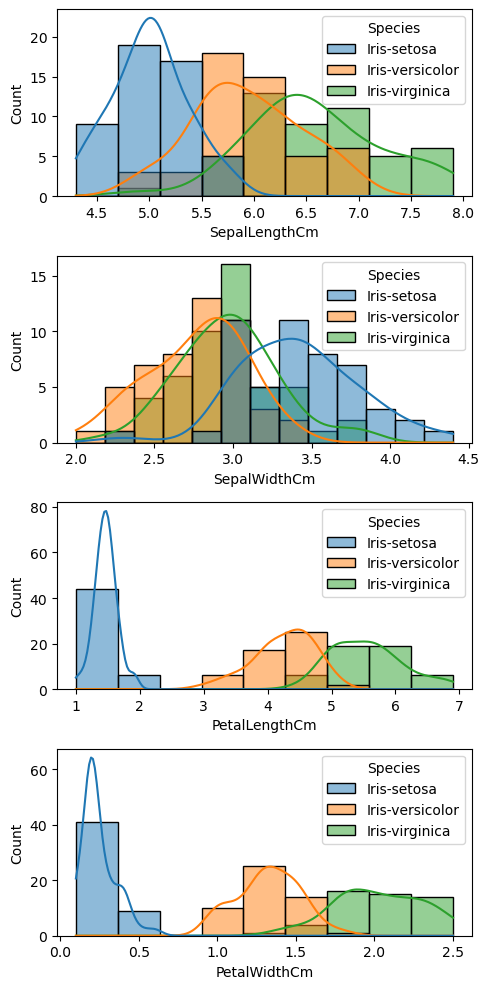

In [8]:
# Create a figure and axes
fig, axs = plt.subplots(4, 1, figsize=(5, 10))

# Create histograms for each feature
sns.histplot(data=iris, x='SepalLengthCm', hue='Species', kde=True, ax=axs[0])
sns.histplot(data=iris, x='SepalWidthCm', hue='Species', kde=True, ax=axs[1])
sns.histplot(data=iris, x='PetalLengthCm', hue='Species', kde=True, ax=axs[2])
sns.histplot(data=iris, x='PetalWidthCm', hue='Species', kde=True, ax=axs[3])

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()


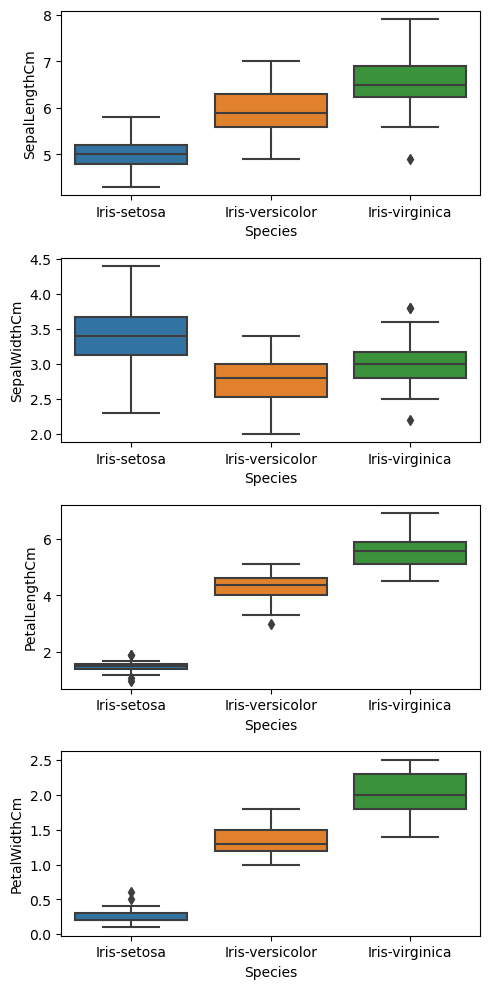

In [9]:
# Create a figure and axes
fig, axs = plt.subplots(4, 1, figsize=(5, 10))

# Create histograms for each feature
sns.boxplot(data=iris, x='Species',y='SepalLengthCm', ax=axs[0])
sns.boxplot(data=iris, x='Species',y='SepalWidthCm', ax=axs[1])
sns.boxplot(data=iris, x='Species',y='PetalLengthCm', ax=axs[2])
sns.boxplot(data=iris, x='Species',y='PetalWidthCm', ax=axs[3])


# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()


Summary:
1. The petal lengths of setosa are generally shorter compared to versicolor and    virginica. Virginica tends to have the longest petals, followed by     versicolor.

2. Setosa tends to have a wider sepal width compared to versicolor and virginica. Virginica, on the other hand, often exhibits a slightly wider sepal than versicolor.

3. There is a high positive correlation between petal length and petal width, suggesting that these two features tend to increase or decrease together.

4. Setosa is easily distinguishable from the other species, particularly due to its shorter petal lengths and wider sepal widths.

# Modelling

**How to Implementing K-Means Clustering ?**

1. Choose the number of clusters k

2. Select k random points from the data as centroids

3. Assign all the points to the closest cluster centroid

4. Recompute the centroids of newly formed clusters
   Repeat steps 3 and 4

In [10]:
#Dataset without Labels
X=iris.iloc[:,1:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
#instantiating the model
model=KMeans(n_clusters=5)
#fitting data into the model
model.fit(X)
#predicting with the model
labels=model.predict(X)

print(labels)

print(labels.shape)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
(150,)


Evaluating the quality of K-means clusters is an important step to determine the effectiveness of the algorithm in partitioning the data. Here are some common methods for evaluating K-means clusters:

In [12]:
df=pd.DataFrame({'labels':labels,
                'species':iris['Species'].values})

In [13]:
ct=pd.crosstab(df['labels'],df['species'])
ct

species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,0,2,36
1,50,0,0
2,0,48,14


# INERTIA
In the context of clustering, inertia (or within-cluster sum of squares) is a measure that quantifies how internally coherent the clusters are. Specifically, it is the sum of squared distances between each data point and its assigned cluster's centroid. The goal of K-means clustering is to minimize this inertia, leading to compact and well-defined clusters.

In [14]:
print(model.inertia_)

78.94084142614602


Significance of Inertia:

Inertia is a measure of how spread out the points within each cluster are. Lower inertia values indicate that the points within each cluster are closer to the centroid, suggesting more compact and well-defined clusters.
The objective of the K-means algorithm is to find cluster assignments and centroids that minimize the overall inertia.

# Elbow Method


The elbow method helps to find the optimal number of clusters (K) by plotting the inertia for different values of K. The "elbow" point in the plot represents a good trade-off between compactness and the number of clusters.
Plot the inertia for different values of K and look for an "elbow" in the plot.

In [15]:
inertias=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,n_init=10)
    model.fit(X)
    inertias.append(model.inertia_)    


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

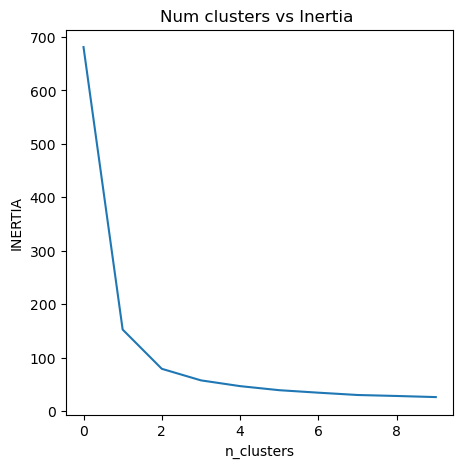

In [16]:
plt.figure(figsize=(5,5))
sns.lineplot(inertias)
plt.xlabel('n_clusters')
plt.ylabel('INERTIA')
plt.title('Num clusters vs Inertia ')
plt.show()

We need to have a balance between num of clusters and Inertia. As shown by the graph num of clusters 3 has a fair amount of Inertia value and after that there is not any exponential but gradual increase in the inertia values

In [32]:
#instantiating the model
model=KMeans(n_clusters=3)
#fitting data into the model
model.fit(X)
#predicting with the model
labels=model.predict(X)

print(labels)

print(labels.shape)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
(150,)


In [27]:
from sklearn.decomposition import PCA

In [29]:
# Reduce the dimensionality for visualization (2D scatter plot)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(X)

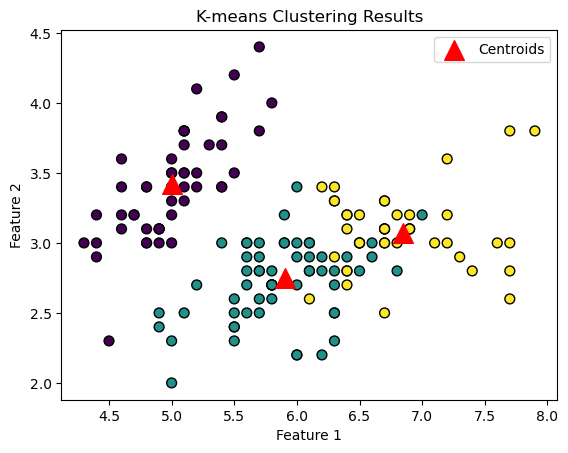

In [39]:
import matplotlib.pyplot as plt

# Assuming X is your 2D dataset

# Scatter plot of data points with predicted labels
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='^', s=200, label='Centroids')

plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
